## 자연어 처리 & 분류 모형 예제
- You are predicting whether a given tweet is about a real disaster or not. 
- If so, predict a 1. If not, predict a 0.

## 텍스트 분석 처리 과정 (딥러닝을 이용한 자연어 처리 입문https://wikidocs.net/book/2155)
1. 데이터 수집(ex. 크롤링)
2. 텍스트 전처리(ex. 특수문자 삭제, 어근 추출 등)
3. 문자를 숫자로 변환(Count, TF-IDF)
4. 머신러닝 모델 학습 및 평가

In [84]:
import pandas as pd
DATA_PATH = 'nlp-getting-started/'
train = pd.read_csv(DATA_PATH + 'train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


- 데이터 파일에 뭐 들었는지 확인하는 법

In [85]:
#import os 

#DATA_PATH = "./"
#for file in os.listdir(DATA_PATH):
#    print(file)

In [86]:
test =  pd.read_csv(DATA_PATH + 'test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## 데이터셋 확인

In [87]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


- 1이 진짜 뉴스
- 0이 가짜 뉴스


In [89]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

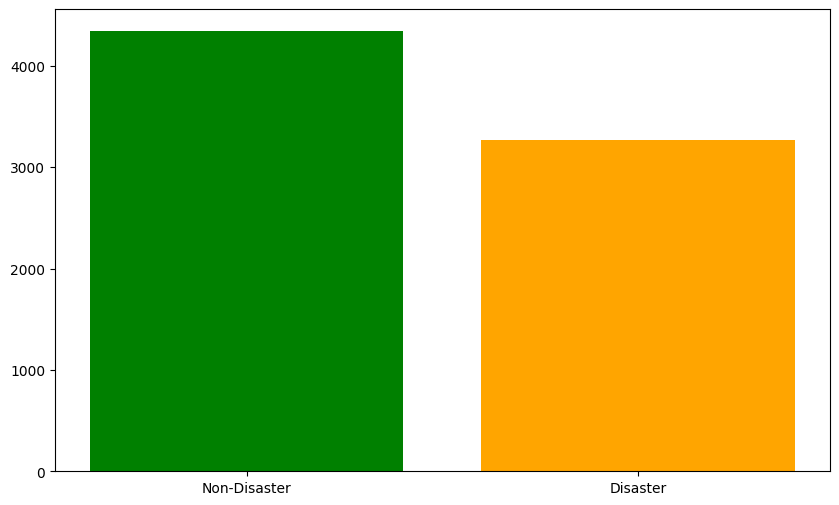

In [90]:
import matplotlib.pyplot as plt
targets = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize= (10,6))
ax.bar(labels, targets, color= ['green', 'orange'])
plt.show()

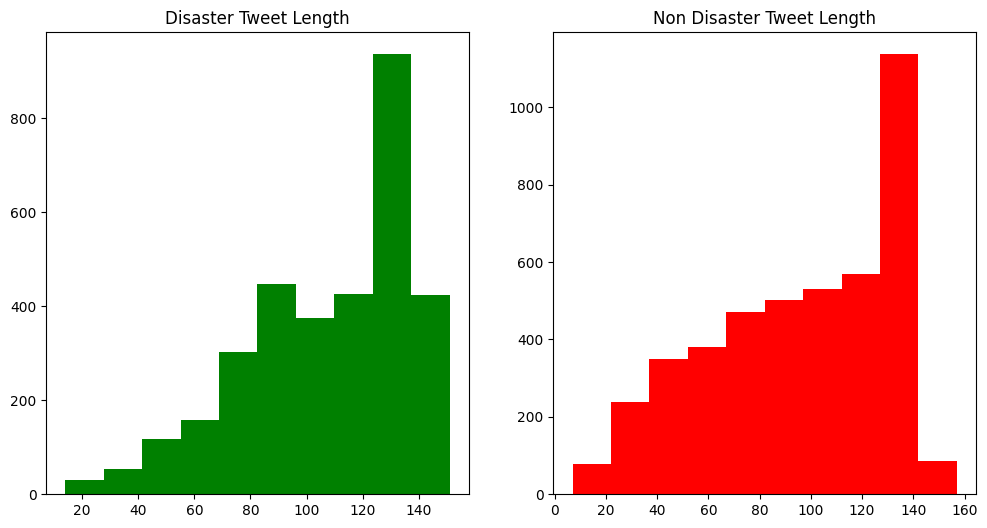

In [91]:
disaster_tweet_len = train[train['target'] == 1]['text'].str.len()
non_disaster_tweet_len = train[train['target'] == 0]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(disaster_tweet_len, color = 'green')
ax[0].set_title('Disaster Tweet Length')

ax[1].hist(non_disaster_tweet_len, color = 'red')
ax[1].set_title('Non Disaster Tweet Length')
plt.show()

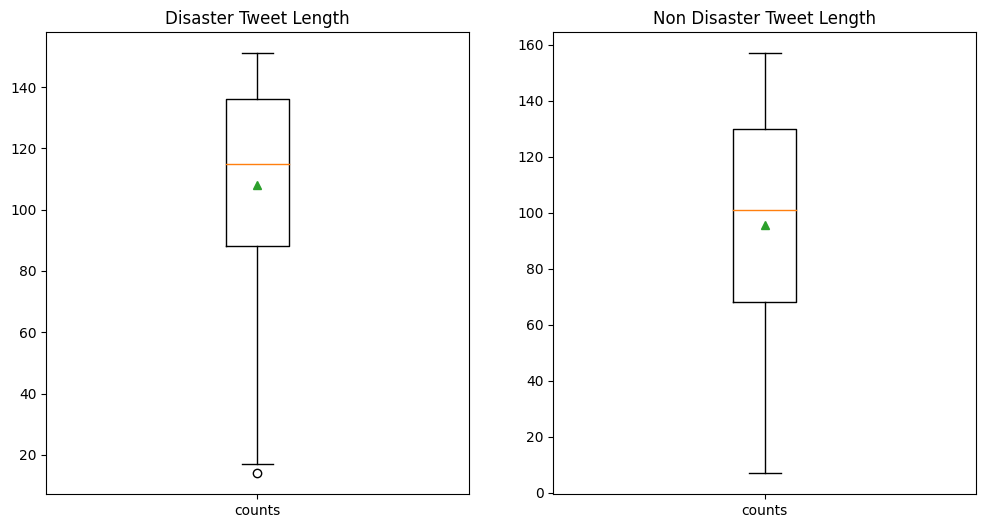

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(disaster_tweet_len, labels = ['counts'], showmeans=True)
ax[0].set_title('Disaster Tweet Length')

ax[1].boxplot(non_disaster_tweet_len, labels = ['counts'], showmeans=True)
ax[1].set_title('Non Disaster Tweet Length')

plt.show()

## 워드 클라우드 작성

In [93]:
'''from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(non_disaster_tweet_keywords)


fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Disaster Tweet")
ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Non Disaster Tweet")
fig.show() '''

'from wordcloud import WordCloud, STOPWORDS\n\ndisaster_tweet_keywords = dict(train[train[\'target\']==1][\'keyword\'].value_counts())\nnon_disaster_tweet_keywords = dict(train[train[\'target\']==0][\'keyword\'].value_counts())\n\nstopwords = set(STOPWORDS)\ndisaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(disaster_tweet_keywords)\nnon_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(non_disaster_tweet_keywords)\n\n\nfig, ax = plt.subplots(1, 2, figsize=(16, 10))\nax[0].imshow(disaster_wordcloud, interpolation=\'bilinear\')\nax[0].axis(\'off\')\nax[0].set_title("Disaster Tweet")\nax[1].imshow(non_disaster_wordcloud, interpolation=\'bilinear\')\nax[1].axis(\'off\')\nax[1].set_title("Non Disaster Tweet")\nfig.show() '

 - 위 코드는 구글 코랩에서 돌아감

## 변수 삭제

In [94]:
test_id = test['id']

for df in [train, test]:
  df = df.drop(['id','keyword', 'location'], axis=1, inplace=True)

In [95]:
train.shape, test.shape

((7613, 2), (3263, 1))

## 텍스트 테이터 전처리

In [96]:
# url
import re

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

sample_text = "새로운 캐글 대회가 열렸습니다. 주소: https://www.kaggle.com/c/nlp-getting-started"
remove_url(sample_text)

'새로운 캐글 대회가 열렸습니다. 주소: '

In [97]:
# html 코드 제거
def remove_html(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)

sample_text ="""<div>
<h1> Real News or Fake News </h1>
<p> Kaggle Machine Learning </p>
</div>"""

print(remove_html(sample_text))


 Real News or Fake News 
 Kaggle Machine Learning 



In [98]:
!pip install emoji --upgrade

In [99]:
import emoji
print(emoji.emojize('Phd is very easy!!! :thumbs_up:'))

Phd is very easy!!! 👍


In [100]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

remove_emoji("Hello, 👍")

'Hello, '

In [101]:
# 특수문자
def remove_punct(text):
  return re.sub("[^a-zA-Z]", " ", text)

sample_text = "Hello!, Can I have one question?.., Is it #Outbreak?"
remove_punct(sample_text)

'Hello   Can I have one question     Is it  Outbreak '

In [102]:
!pip install nltk

In [103]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print("Total Length of stopwords:", len(stopwords.words('english')))
print(stopwords.words('english')[:10])
# 불용어제거
# I have a dream

Total Length of stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
  # remove url 
  url = re.compile(r'https?://\S+|www\.\S+')
  cleaned_text = url.sub(r'', text)

  # remove html
  html = re.compile(r'<.*?>')
  cleaned_text = html.sub(r'', cleaned_text)

  # remove emoji
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'', cleaned_text)

  # Special Letters to empty space
  cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)

  # Lowercase
  cleaned_text = cleaned_text.lower().split()

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    cleaned_text = [word for word in cleaned_text if not word in stops]
    clean_review = ' '.join(cleaned_text)
  else:
    clean_review = ' '.join(cleaned_text)

  return clean_review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- 클라이언트가 만족할때까지 여기서 더 보완해야 한다.

In [105]:
clean_train_reviews = []
for datas in [train, test]:
    datas['cleaned_text'] = datas['text'].apply(lambda x : data_cleansing(x, remove_stopwords=True))

In [106]:
train.head(5)

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


## 텍스트를 숫자로 변환
- 벡터화(Vectorizer)

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
# 말뭉치
corpus = ['Can I have lunch with you?',     # 문서 1
          'No, I cannot have it with you.', # 문서 2
          'Because, I need to study later'] # 문서 3

vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 0 1 0 0 0 0 1 1]
 [0 0 1 1 1 0 0 0 1 0 0 1 1]
 [1 0 0 0 0 1 0 1 0 1 1 0 0]]
{'can': 1, 'have': 3, 'lunch': 6, 'with': 11, 'you': 12, 'no': 8, 'cannot': 2, 'it': 4, 'because': 0, 'need': 7, 'to': 10, 'study': 9, 'later': 5}


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

corpus = ['Can I have lunch with you?', 
          'No, I cannot have it with you.', 
          'Because, I need to study later']

vector = TfidfVectorizer()
print(np.round(vector.fit_transform(corpus).toarray(), 2))
print(vector.vocabulary_)

[[0.   0.52 0.   0.39 0.   0.   0.52 0.   0.   0.   0.   0.39 0.39]
 [0.   0.   0.46 0.35 0.46 0.   0.   0.   0.46 0.   0.   0.35 0.35]
 [0.45 0.   0.   0.   0.   0.45 0.   0.45 0.   0.45 0.45 0.   0.  ]]
{'can': 1, 'have': 3, 'lunch': 6, 'with': 11, 'you': 12, 'no': 8, 'cannot': 2, 'it': 4, 'because': 0, 'need': 7, 'to': 10, 'study': 9, 'later': 5}


In [113]:
# 데이터 변환
# 데이터셋 분리

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0,
                             analyzer = 'char',
                             sublinear_tf = True,
                             ngram_range = (1,3), max_features = 10000)

X = vectorizer.fit_transform(train['cleaned_text'])
y = train['target'].values

In [114]:
print(X.shape)
print(y.shape)

(7613, 9444)
(7613,)


## 현업에서 느낀 것
- 데이터 분석 --> 텍스트 마이닝/ 정형데이터와 관련된 것
- 개발자 --> 딥러닝/ 자연어(챗봇, 번역기, 기타 등등)


In [115]:
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5329, 9444), (2284, 9444), (5329,), (2284,))

## 모델링

In [116]:
from sklearn.linear_model import LogisticRegression 
lgs = LogisticRegression()
lgs.fit(X_train, y_train)

LogisticRegression()

In [117]:
testset = vectorizer.transform(test['cleaned_text'])
print(testset.shape)

(3263, 9444)


In [118]:
y_preds = lgs.predict(testset)
print(y_preds[:5])
print(len(y_preds))

[1 1 1 1 1]
3263


In [122]:
submission = pd.DataFrame({'id': test_id, 'target': y_preds})
submission.to_csv("submission_230329.csv", index=False)